In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [120]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20   # The value is trail and error it may be 10,20,30,40.....

In [121]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(

    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,

)


Found 9127 files belonging to 8 classes.


In [122]:
class_name = dataset.class_names
class_name

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_healthy']

In [123]:
len(dataset)

286

In [124]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

# Print the image class in array format

(32, 256, 256, 3)
[3 1 1 6 3 1 3 3 1 6 7 7 3 6 7 1 0 7 7 7 3 6 3 2 1 6 1 7 1 6 7 6]


In [125]:
# Actually printing the Image of plants using Index in array(dataset)

# For printing only one image at a time 
# for image_batch, label_batch in dataset.take(1):
#     pp.imshow(image_batch[0].numpy().astype("uint8"))
#     pp.title(class_name[label_batch[0]])
#     pp.axis("off")


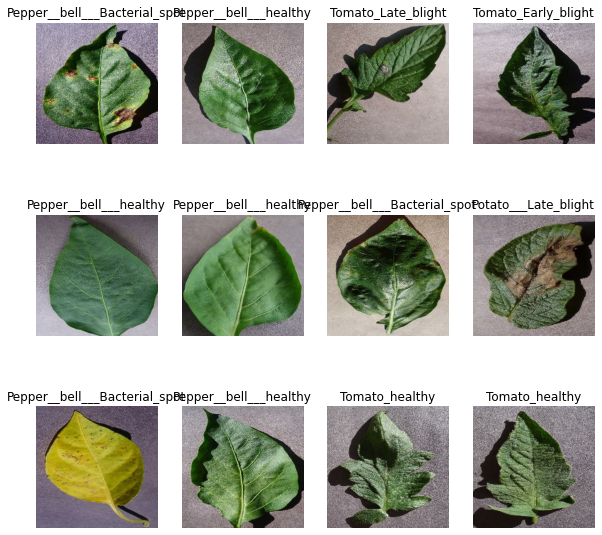

In [126]:
# For printing bunch of images at a same time usinf for loop
pp.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = pp.subplot(3,4,i+1)
        pp.imshow(image_batch[i].numpy().astype("uint8"))
        pp.title(class_name[label_batch[i]])
        pp.axis("off")


In [127]:
len(dataset)

286

80% ==> Training 
20% ==> 10% Validation and 10% test 

In [128]:
train_size = 0.8
len(dataset)*train_size

228.8

228.8 approximatly 228 

In [129]:
# Why we are doing approximation because the Method / function only accepts the integer values
train_ds = dataset.take(228)
len(train_ds)

228

In [130]:
test_ds = dataset.skip(228)
len(test_ds)

58

In [131]:
val_size = 0.1
len(dataset)*val_size

28.6

In [132]:
val_ds = test_ds.take(28)
len(val_ds)

28

In [133]:
test_size = 0.1
test_ds = test_ds.skip(28)
len(test_ds)

30

In [134]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=1000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    test_size = int(ds_size * test_split)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)





    return train_ds,val_ds,test_ds

In [135]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [136]:
# Confirmation
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

228
28
30


In [137]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [138]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    ])


In [139]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])


In [140]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [141]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_15 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_28 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [142]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [143]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import os
model_version = max([int(i) for i in (os.listdir("../models")+[0])]) + 1
model.save(f"../models/{model_version}")

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
# plt.figure(figsize=(15, 15))
# for images, labels in test_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         predicted_class, confidence = predict(model, images[i].numpy())
        
#         actual_class = class_names[labels[i]] 
#         plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
#         plt.axis("off")